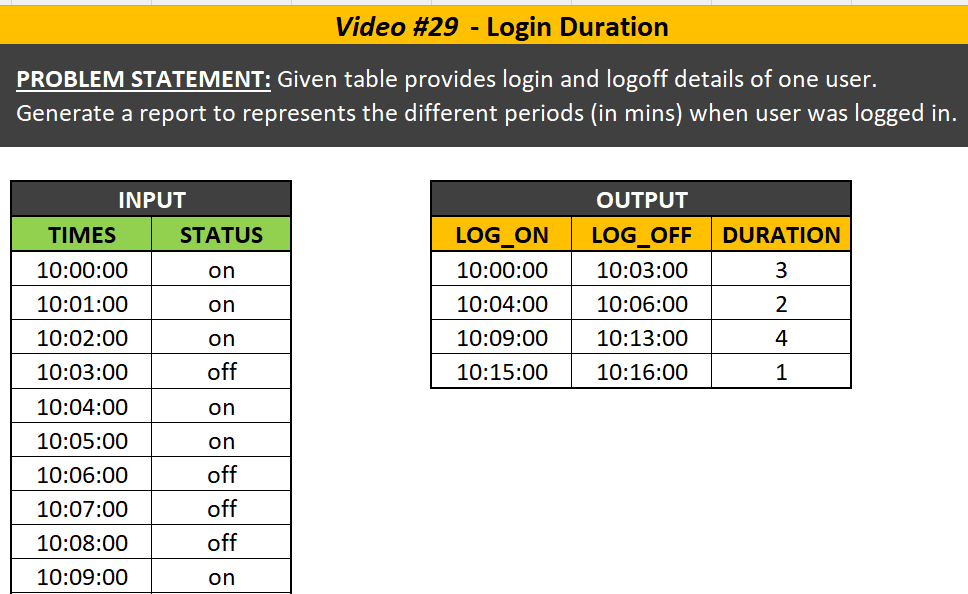

In [73]:
import pandas as pd

# Create a list of dictionaries from the data in the image
data = [
    {"TIMES": "10:00:00", "STATUS": "on"},
    {"TIMES": "10:01:00", "STATUS": "on"},
    {"TIMES": "10:02:00", "STATUS": "on"},
    {"TIMES": "10:03:00", "STATUS": "off"},
    {"TIMES": "10:04:00", "STATUS": "on"},
    {"TIMES": "10:05:00", "STATUS": "on"},
    {"TIMES": "10:06:00", "STATUS": "off"},
    {"TIMES": "10:07:00", "STATUS": "off"},
    {"TIMES": "10:08:00", "STATUS": "off"},
    {"TIMES": "10:09:00", "STATUS": "on"},
    {"TIMES": "10:10:00", "STATUS": "on"},
    {"TIMES": "10:11:00", "STATUS": "on"},
    {"TIMES": "10:12:00", "STATUS": "on"},
    {"TIMES": "10:13:00", "STATUS": "off"},
    {"TIMES": "10:14:00", "STATUS": "off"},
    {"TIMES": "10:15:00", "STATUS": "on"},
    {"TIMES": "10:16:00", "STATUS": "off"},
    {"TIMES": "10:17:00", "STATUS": "off"}
]

# Convert the list into a DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
print(df)


       TIMES STATUS
0   10:00:00     on
1   10:01:00     on
2   10:02:00     on
3   10:03:00    off
4   10:04:00     on
5   10:05:00     on
6   10:06:00    off
7   10:07:00    off
8   10:08:00    off
9   10:09:00     on
10  10:10:00     on
11  10:11:00     on
12  10:12:00     on
13  10:13:00    off
14  10:14:00    off
15  10:15:00     on
16  10:16:00    off
17  10:17:00    off


In [74]:
df["new"]=df["STATUS"].map({"on": 1, "off":0})
df["new-status"]=df["new"].diff(periods=1)
result = df[(df["new-status"]==-1) | (df["new-status"]==1) | pd.isna(df["new-status"])]
result.reset_index(inplace=True)
result["TIMES"]=pd.to_datetime(result["TIMES"])

log_on = []
log_out = []
duration = []

for index in range(0,len(result),2):
    log_on.append(result.loc[index,"TIMES"])
    log_out.append(result.loc[index+1,"TIMES"])
    duration.append( result.loc[index+1,"TIMES"]-result.loc[index,"TIMES"])


C:\Users\91956\AppData\Local\Temp\ipykernel_7232\1296740477.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  result["TIMES"]=pd.to_datetime(result["TIMES"])
C:\Users\91956\AppData\Local\Temp\ipykernel_7232\1296740477.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result["TIMES"]=pd.to_datetime(result["TIMES"])


In [75]:
final = pd.DataFrame( { "LOG_ON": log_on, "LOG_OUT":log_out, "DURATION": duration})
final["LOG_ON"] = final["LOG_ON"].dt.time
final["LOG_OUT"] = final["LOG_OUT"].dt.time
final['DURATION'] = final['DURATION'].dt.total_seconds() / 60
print(final)

     LOG_ON   LOG_OUT  DURATION
0  10:00:00  10:03:00       3.0
1  10:04:00  10:06:00       2.0
2  10:09:00  10:13:00       4.0
3  10:15:00  10:16:00       1.0
